In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the Excel files into DataFrames
nsebank_df = pd.read_excel('nsebank_f.xlsx')
dxy_df = pd.read_excel('dxy_f.xlsx')

# Rename the columns for better readability
nsebank_df.columns = ['Date', 'NSE_Bank_Index']
dxy_df.columns = ['Date', 'DXY_Index']

# Convert the 'Date' columns to datetime format
nsebank_df['Date'] = pd.to_datetime(nsebank_df['Date'])
dxy_df['Date'] = pd.to_datetime(dxy_df['Date'])

# Set the 'Date' column as the index
nsebank_df.set_index('Date', inplace=True)
dxy_df.set_index('Date', inplace=True)
#dxy_df.head()
nsebank_df.head()

,NSE_Bank_Index
Date,
2005-01-04,3560.40
2005-01-05,3400.06
2005-01-06,3310.94
2005-01-07,3341.12
2005-01-10,3263.63


In [14]:
common_dates = nsebank_df.index.intersection(dxy_df.index)
nsebank_df = nsebank_df.loc[common_dates]
dxy_df = dxy_df.loc[common_dates]

# Calculate monthly returns for the Nifty Bank Index
nsebank_df['Daily_Return'] = nsebank_df['NSE_Bank_Index'].pct_change() * 100

# Drop the first row with NaN values in returns
nsebank_df = nsebank_df.dropna(subset=['Daily_Return'])

# Merge the dataframes on dates
merged_df = pd.merge(nsebank_df[['Daily_Return']], dxy_df, left_index=True, right_index=True)

# Display the first few rows of the merged dataframe
merged_df.tail()

,Daily_Return,DXY_Index
Date,,
2024-06-12,0.380942,104.645
2024-06-13,-0.097004,105.196
2024-06-14,0.311555,105.550
2024-06-18,0.877765,105.256
2024-06-19,1.897567,105.180


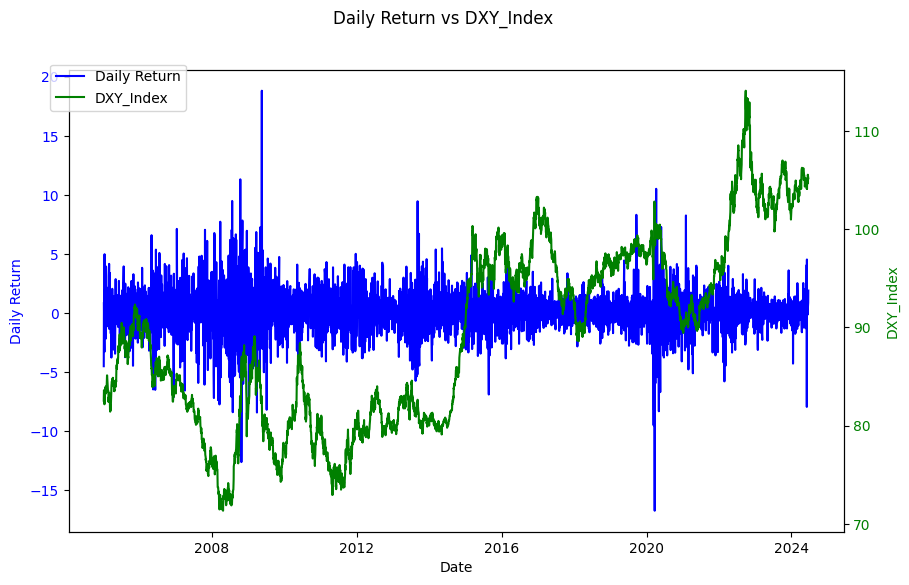

In [15]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6)) 

# Plot the Monthly Return on the first y-axis
ax1.plot(merged_df.index, merged_df['Daily_Return'], label='Daily Return', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Return', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()
ax2.plot(merged_df.index, merged_df['DXY_Index'], label='DXY_Index', color='green')
ax2.set_ylabel('DXY_Index', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and legend
fig.suptitle('Daily Return vs DXY_Index')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Display the plot
plt.show()


<b>Visualising the two plots at two different y-axis</b>

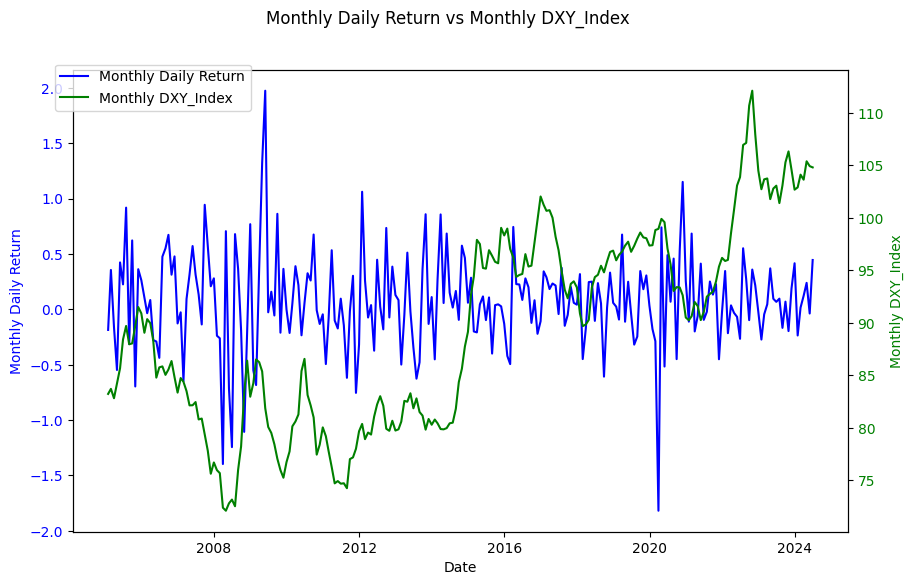

In [16]:
import pandas as pd

# Resample the data to monthly frequency
monthly_data = merged_df.resample('M').mean()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6)) 

# Plot the Monthly Return on the first y-axis
ax1.plot(monthly_data.index, monthly_data['Daily_Return'], label='Monthly Daily Return', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Daily Return', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()
ax2.plot(monthly_data.index, monthly_data['DXY_Index'], label='Monthly DXY_Index', color='green')
ax2.set_ylabel('Monthly DXY_Index', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and legend
fig.suptitle('Monthly Daily Return vs Monthly DXY_Index')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Display the plot
plt.show()


In [17]:
import scipy.stats as stats

# Assuming 'merged_df' contains columns 'Daily_Return' for NSE Bank daily return and 'DXY_Index' for DXY index
nsebank_returns = merged_df['Daily_Return']
dxy_index = merged_df['DXY_Index']

# Calculate Pearson correlation coefficient
pearson_corr, p_value = stats.pearsonr(nsebank_returns, dxy_index)

# Calculate the t-statistic for the Pearson correlation
n = len(nsebank_returns)
t_statistic = pearson_corr * (n - 2) ** 0.5 / (1 - pearson_corr ** 2) ** 0.5

# Output the results
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {p_value}")
print(f"T-statistic: {t_statistic}")

# Determine if the correlation is significant at the 0.05 level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between NSE Bank daily return and DXY index.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between NSE Bank daily return and DXY index.")


Pearson Correlation Coefficient: -0.006223891613396009
P-value: 0.6665621533376821
T-statistic: -0.43089767149633607
Fail to reject the null hypothesis: There is no significant correlation between NSE Bank daily return and DXY index.


<b>p-value : 0.6665621533376821</b>  
    
    Since this is greater than our significance level(0.05), we reject the null hypothesis

<b> Fail to reject the null hypothesis: There is no significant correlation between NSE Bank daily return and DXY index.</b>